<a href="https://colab.research.google.com/github/mgmboyd/Google-Colab/blob/master/Copy_of_DA_Unit3_L3%264_07232020_BREAKOUT_RM_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [ ]:
# Plotting new COVID deaths in NY using SNA and/or PLOTLY





In [ ]:
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [ ]:
df.shape

(7824, 5)

In [ ]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

New York data for Covid 19

In [ ]:
ny_df = df[df['state']=='New York']

In [ ]:
ny_df.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [ ]:
ny_df.shape

(144, 5)

In [ ]:
ny_df.tail()

,date,state,fips,cases,deaths
7582,2020-07-18,New York,36,411006,32167
7637,2020-07-19,New York,36,411515,32187
7692,2020-07-20,New York,36,412034,32203
7747,2020-07-21,New York,36,412889,32218
7802,2020-07-22,New York,36,413595,32228


In [ ]:
#first death in NY
first_ny_death = ny_df[ny_df['deaths']!=0]
first_ny_death.head()

,date,state,fips,cases,deaths
669,2020-03-14,New York,36,610,2
722,2020-03-15,New York,36,732,6
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1375,18
882,2020-03-18,New York,36,2387,32


In [ ]:
#total number of cases
ny_df['cases'].max()

413595

In [ ]:
# not a correct way of calculating total count bcoz data is cumulative
ny_df['cases'].sum()

38237858

In [ ]:
#new cases for NY
# type(ny_df['cases'])

newcase = []
previuos_case = 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

In [ ]:
ny_df['new_cases'] = newcase

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ny_df.head(10)

,date,state,fips,cases,deaths,new_cases
246,2020-03-01,New York,36,1,0,1
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,1
293,2020-03-04,New York,36,11,0,9
313,2020-03-05,New York,36,22,0,11
338,2020-03-06,New York,36,44,0,22
369,2020-03-07,New York,36,89,0,45
404,2020-03-08,New York,36,106,0,17
440,2020-03-09,New York,36,142,0,36
478,2020-03-10,New York,36,173,0,31


In [ ]:
my_list = [12,34,56,'apple',23.99]

In [ ]:
my_list

[12, 34, 56, 'apple', 23.99]

In [ ]:
my_list.append('Furhan')

In [ ]:
my_list

[12, 34, 56, 'apple', 23.99, 'Furhan']

In [ ]:
my_list.insert(2,'Mary')

In [ ]:
my_list

[12, 34, 'Mary', 56, 'apple', 23.99, 'Furhan']

In [ ]:
my_list[-3:]

['apple', 23.99, 'Furhan']

In [ ]:
ny_df['new_cases'].sum()

413595

In [ ]:
ny_cases = ny_df['cases']
ny_deaths = ny_df['deaths']
ny_dates = ny_df['date']
ny_new_cases = ny_df['new_cases']

In [ ]:
type(ny_new_cases)

pandas.core.series.Series

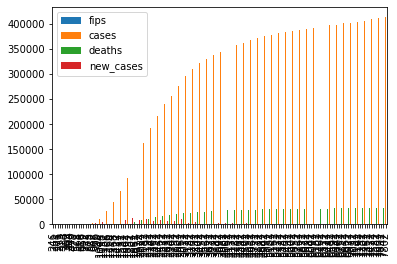

In [ ]:
ny_df.plot(kind='bar')

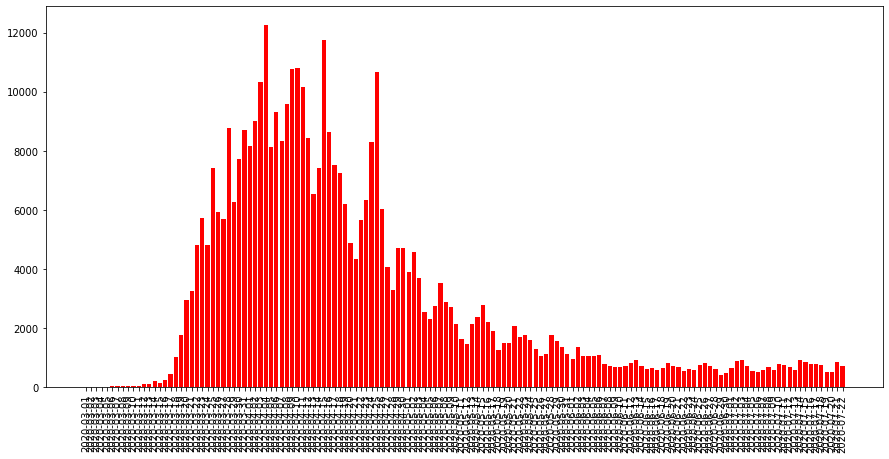

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates, height=ny_new_cases, color='red')
plt.xticks(rotation=90)
plt.show()

# NY data in last 30 days

In [ ]:
ny_cases_30 = ny_df['cases'][-31:-1]
ny_deaths_30 = ny_df['deaths'] [-31:-1]
ny_dates_30 = ny_df['date'][-31:-1]
ny_new_cases_30 = ny_df['new_cases'][-31:-1]

In [ ]:
# ny_dates_30

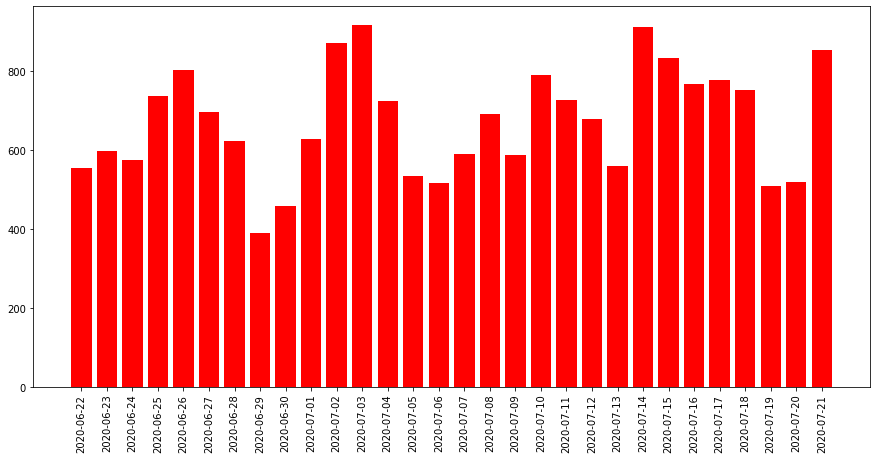

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.show()

In [ ]:
states = ['New York', 'California','Florida', 'Texas','Arizona']


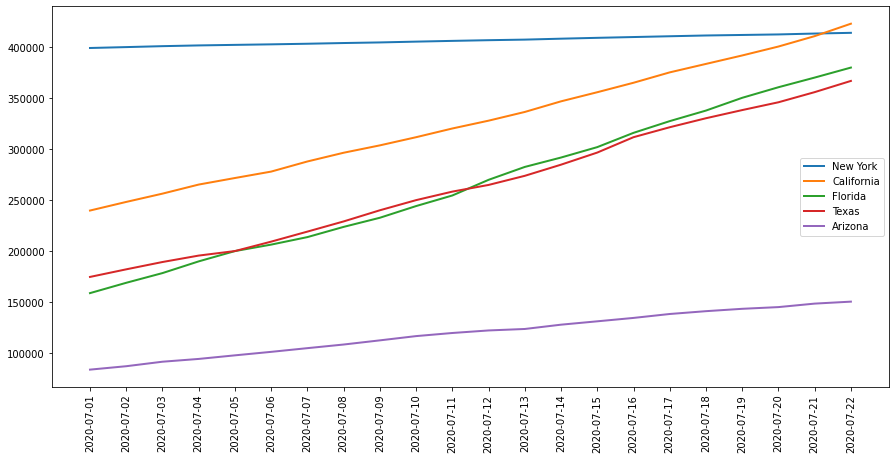

In [ ]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-07-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()


BREAKOUT ROOM #1 on Saturday, 7/25/2020

In [ ]:
# COVID Cases in Florida
fl_df = df[df['state']=='Florida']

In [ ]:
fl_df.head()

,date,state,fips,cases,deaths
242,2020-03-01,Florida,12,2,0
255,2020-03-02,Florida,12,2,0
270,2020-03-03,Florida,12,3,0
286,2020-03-04,Florida,12,3,0
304,2020-03-05,Florida,12,4,0


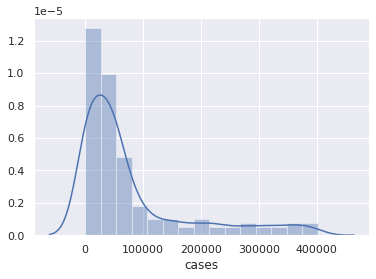

In [ ]:
# Plot the number of cases
sns.distplot(fl_df['cases'])

In [ ]:
# Plot the Number of Deaths in Florida over the last 30 days
# Box plot
# fl_cases_30 = fl_df['cases'][-31:-1]
# fl_deaths_30 = fl_df['deaths'] [-31:-1]
# fl_dates_30 = fl_df['date'][-31:-1]

In [ ]:
# fl_dates_30

In [ ]:
# Create a new dataframe for new deaths in Florida
new_fl_df=fl_df[fl_df['date']>='2020-07-01']

In [ ]:
# deaths = sns.load_dataset("new_fl_df") - plot for new deaths in Florida (error message)
new_fl_df.head()

,date,state,fips,cases,deaths
6623,2020-07-01,Florida,12,158989,3549
6678,2020-07-02,Florida,12,169098,3616
6733,2020-07-03,Florida,12,178586,3683
6788,2020-07-04,Florida,12,190044,3701
6843,2020-07-05,Florida,12,200103,3730


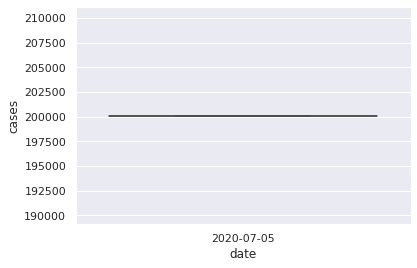

In [ ]:
# Boxplot for New Cases Based on Date
sns.boxplot(x='date', y='cases', data=new_fl_df[new_fl_df['date']=='2020-07-05'])

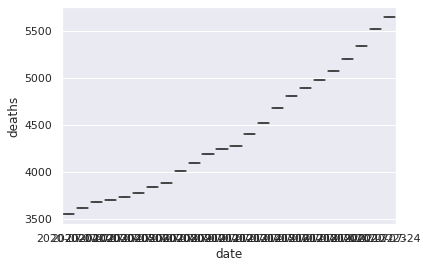

In [ ]:
# Boxplot for Deaths based on Date
sns.boxplot(x='date', y='deaths', data=new_fl_df)

In [ ]:
# END

In [ ]:
sns.pairplot(deaths)

NameError: ignored

In [ ]:
states = ['California','Florida', 'Texas']

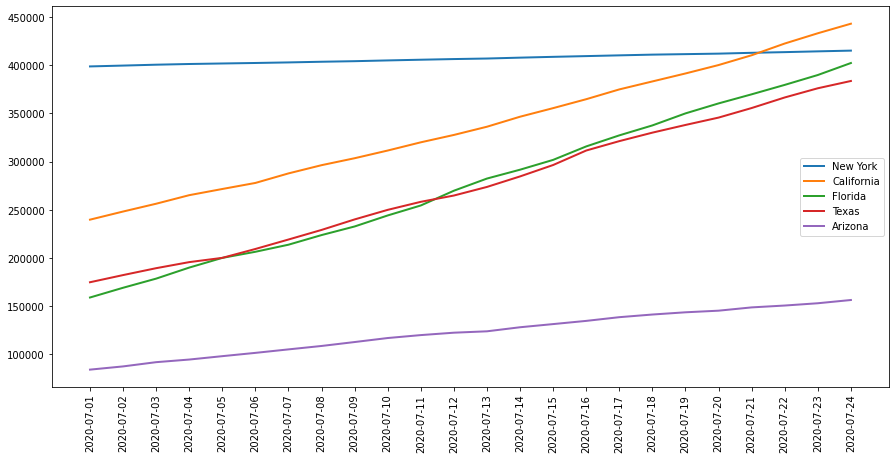

In [ ]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-07-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()
